In [7]:
import torch
from pprint import pprint
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

import os

from utils import *

In [39]:
batch = []
human_surps_dirs = list(Path(r"C:\Users\Tianqi Zhang\Desktop\Balancing-The-Flow\Surprisal_outputs\human").iterdir())
mst_surps_dirs = list(Path(r"C:\Users\Tianqi Zhang\Desktop\Balancing-The-Flow\Surprisal_outputs\mistral-7b-v0.1").iterdir())

human_UIDs = []
mist_UIDs = []
for human_surps_dir, mst_surps_dir in zip(human_surps_dirs, mst_surps_dirs):
    try:
        human_surps = pd.read_csv(human_surps_dir).iloc[:, 1:]
        mst_surps = pd.read_csv(mst_surps_dir).iloc[:, 1:]

        h_UID = UID_variance(human_surps)
        m_UID = UID_variance(mst_surps)

        human_UIDs.append(h_UID)
        mist_UIDs.append(m_UID)
    except:
        continue


In [40]:
np.mean(human_UIDs), np.mean(mist_UIDs)

(np.float64(15.486457856865723), np.float64(10.583646373403004))

In [41]:
all_UIDs = human_UIDs + mist_UIDs
obs_ts = np.mean(human_UIDs) - np.mean(mist_UIDs)
sim_ts = []
for i in range(1000):
    permuted = np.random.permutation(all_UIDs)
    half_length = len(permuted) // 2
    sim = np.mean(permuted[:half_length]) - np.mean(permuted[half_length:])
    sim_ts.append(sim)

<Axes: ylabel='Count'>

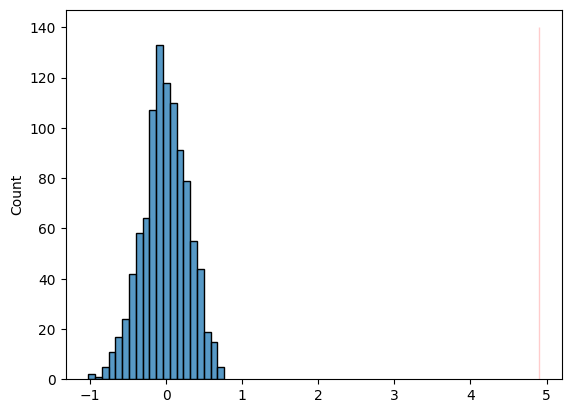

In [42]:
sns.histplot(sim_ts, bins=20)
sns.lineplot(x=[obs_ts, obs_ts], y=[0, 140], color='red')

In [20]:
from pathlib import Path
p = Path("test/file.txt")
r = Path("test2")
r / p.with_suffix(".csv").name

WindowsPath('test2/file.csv')